# 文档结构

- IO
    - 数据文件读写（CSV）

- 全局函数
    - 一般都会在下面类中出现（快捷方式）
        - Series（一维数据）
        - DataFrame（二维数数据）：重点
        - Panel（三维数据）
----

- 重点包含三种数据结构
    - Series（一维列表数据集）
    - **DataFrame（二维数据数据表）**
        - 数据操作
    - Panel（三维数据集）
    
----

- 三种数据集的比较复杂的操作
    - Index
    - 标量
    - 窗口 / 分组(子数据集 /  按照字段分类)
    - 采样
    - 保存的数据格式Style
    - 图形（plot）


# pandas的编程模式

- 创建或者获取数据集（Series，DataFrame）
    - 使用DataFrame的构造器创建数据集
    - 从文件中读物数据集
    - 第三方的数据工具（第三方模型）
    
- 数据集的操作
    - 数据容器的基本操作（增加删除修改，遍历查找：行，列）
    - 数据操作（处理）
        - 运算符
        - 分组
        - 窗口
        - ....
    
- 数据可视化（选择比较直观的图形）
    

In [27]:
% matplotlib inline
import pandas as pd

# 数据集模式第一步：获取、创建数据集
alg = pd.read_csv('alg.csv')      # 通过pandas提供的函数读取数据集

alg[0:3]

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
0,跨越新科技,本科,互联网,未融资,北京 朝阳区 酒仙桥,算法工程师,10000人以上,25k-40k,发布于11:54,3-5年
1,水滴筹,本科,移动互联网,B轮,北京 朝阳区 望京,算法工程师,1000-9999人,25k-50k,发布于02月25日,3-5年
2,蚂蚁金服,本科,互联网,C轮,北京 朝阳区 呼家楼,算法工程师/专家,10000人以上,30k-60k,发布于14:36,经验不限


In [5]:
# 数据集模式第二步：数据操作（数据处理：属性 + 方法）： 数据分析
gp = alg.groupby('job_listed')   # 按照 job_listed 字段分组

ct = gp.count()   # 按照分组统计数数（缺失值也计算）
ct

,job_company,job_education,job_industry,job_location,job_name,job_persons,job_salary,job_time,job_year
job_listed,,,,,,,,,
A轮,49,49,49,49,49,49,49,49,49
B轮,31,31,31,31,31,31,31,31,31
C轮,33,33,33,33,33,33,33,33,33
D轮及以上,41,41,41,41,41,41,41,41,41
不需要融资,47,47,47,47,47,47,47,47,47
天使轮,14,14,14,14,14,14,14,14,14
已上市,51,51,51,51,51,51,51,51,51
未融资,19,19,19,19,19,19,19,19,19


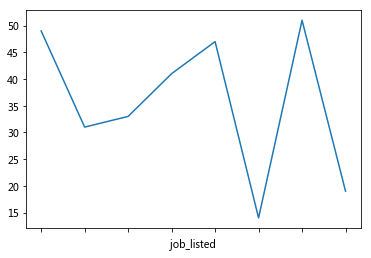

In [7]:
# 数据集模式第三步：数据可视化（matplotlib独立模块可视化 + pandas内置可视化[本质使用matplotlib模块]）
ct = ct['job_company']    # 只显示公司名
ct.plot()

- **注意**：
    - 重点讲解二维，能使用一维。

# 数据源

## 使用构造器创建

- 构造器说明

```python

    class pandas.DataFrame(
        data=None,     # 数据集的数据内容（二维）
        index=None,    # 行标签
        columns=None,    # 列的标签
        dtype=None,     # 数据类型（使用通用类型统一数据类型：通用编程 ）: numpy的数据类型一样
        copy=False)    # 克隆（两个独立控制）与引用（共享数据空间）：NumPy的ndarray + DataFrame

```

1. 理解data

In [9]:
import pandas

# df = pandas.DataFrame()  没有行，没有列

df = pandas.DataFrame(data = [
    [1, 2, 3, 4, 5],   # 行的数据
    [5, 6, 7, 8, 9]   
#列1,列2,列3,列4
])

# 这个数据采用默认的行标签与列标签（范围整数）
df

,0,1,2,3,4
0,1,2,3,4,5
1,5,6,7,8,9


In [10]:
import pandas

# df = pandas.DataFrame()  没有行，没有列

df = pandas.DataFrame(data = [1,2,3,4])

df

,0
0,1
1,2
2,3
3,4


2. index与columns列标签的使用

In [14]:
import pandas


df = pandas.DataFrame(    # ndarray = python  二维list等价 
    data = [
        [1, 2, 3, 4, 5],   
        [5, 6, 7, 8, 9] 
    ],
    index=['第一行','第二行'],
    columns= ['列1','列2','列3','列4','列5',]
)


df

,列1,列2,列3,列4,列5
第一行,1,2,3,4,5
第二行,5,6,7,8,9


3. data是字典的情况
    - 字典：映射：key：value：指定列名
    - 使用了字段，不建议使用columns

In [23]:
import pandas as pd
import numpy

df = pd.DataFrame(
    data = {
        '列1': [1,2,3,4],    # 对应列
        '列2':['jack', 'Rose', 'tom', 'Obama'] 
    },
    index=['A1','A2','A3','A4'],
    dtype = float
)

df


,列1,列2
A1,1.0,jack
A2,2.0,Rose
A3,3.0,tom
A4,4.0,Obama


- 创建数据集的方式两种：
    - data单纯的数据，使用index，columns指定行列标签
    - data中指定列名，使用index定制行标签
    
    
- 建议：
    - 没有特殊情况，行标签都使用整数范围标签索引

## 从文件读取数据

```python
 
    pandas.read_csv(    c（comma）s（separetes）v（values）
        filepath_or_buffer,    # 文件名，或者文件对象
        sep=', ',    # 列的分隔符，通常是逗号comma
        delimiter=None,   # 等同sep
        header='infer',    # 第一行当成列
        names=None,    # 指定列名
        index_col=None,   # 行标签
        usecols=None,    # 选择要读取的列
        na_values=None,  # NaN的替代值
        na_filter=True,  # 过滤居右NaN值的行
        keep_default_na=True, # 保存缺省的控制
                    
        squeeze=False,   # 压缩维数 
        prefix=None, 
        mangle_dupe_cols=True, 
        dtype=None, 
        engine=None, 
        converters=None, 
        true_values=None, 
        false_values=None, 
        skipinitialspace=False, 
        skiprows=None, nrows=None, 
        
        keep_default_na=True, 
      
        verbose=False, 
        skip_blank_lines=True, 
        parse_dates=False, 
        infer_datetime_format=False, 
        keep_date_col=False, 
        date_parser=None, 
        dayfirst=False, 
        iterator=False, 
        chunksize=None, 
        compression='infer', 
        thousands=None, 
        decimal=b'.', 
        lineterminator=None, 
        quotechar='"', 
        quoting=0, 
        escapechar=None, 
        comment=None, 
        encoding=None, 
        dialect=None, 
        tupleize_cols=None,
        error_bad_lines=True, 
        warn_bad_lines=True, 
        skipfooter=0, 
        doublequote=True, 
        delim_whitespace=False, 
        low_memory=True, 
        memory_map=False, float_precision=None
                
```

1. 文件名与分隔符

In [31]:
import pandas as pd


fd = open('python.csv','r')
data = pd.read_csv(fd, sep=',')

data =data[0:3]
fd.close()
data

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
0,旷视科技,本科,移动互联网,C轮,北京 海淀区 中关村,Python,1000-9999人,20k-30k,发布于昨天,3-5年
1,赤骥商贸有限公司,大专,贸易/进出口,未融资,北京 朝阳区 朝外,PYthon,100-499人,12k-24k,发布于昨天,5-10年
2,传智播客,学历不限,在线教育,已上市,北京 昌平区 回龙观,python讲师(J11808),1000-9999人,25k-35k,发布于02月20日,经验不限


2. header的使用
     - int or list of ints, default ‘infer’
         - int 指定哪一行作为列标签；而且数据就从改行开始

In [90]:
import  pandas as pd

data = pd.read_csv('python.csv', header = [0,1,2] )

data[0:3]

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
,旷视科技,本科,移动互联网,C轮,北京 海淀区 中关村,Python,1000-9999人,20k-30k,发布于昨天,3-5年
,赤骥商贸有限公司,大专,贸易/进出口,未融资,北京 朝阳区 朝外,PYthon,100-499人,12k-24k,发布于昨天,5-10年
0,传智播客,学历不限,在线教育,已上市,北京 昌平区 回龙观,python讲师(J11808),1000-9999人,25k-35k,发布于02月20日,经验不限
1,佰钧成技术,学历不限,计算机软件,不需要融资,北京 朝阳区 望京,Python,1000-9999人,12k-19k,发布于02月14日,1-3年
2,iHandy,本科,移动互联网,不需要融资,北京 海淀区 五道口,Python,100-499人,25k-50k,发布于02月16日,3-5年


3. names的使用

    - 列签名
         -指定names，所有行作为数据处理（使用header过滤列所在行）

In [45]:
import pandas as pd

data = pd.read_csv('java.csv', names= ['A','B','C','D','E','F','G','H','I','J'] ,header=0)

data[0:3]

,A,B,C,D,E,F,G,H,I,J
0,阿里巴巴集团,本科,互联网,已上市,北京 朝阳区 望京,Java,10000人以上,20k-40k,发布于02月18日,3-5年
1,达达-京东到家,本科,O2O,D轮及以上,北京 大兴区 亦庄,Java,1000-9999人,15k-30k,发布于14:43,5-10年
2,蚂蚁金服,本科,互联网,C轮,北京 朝阳区 朝外,Java,10000人以上,30k-50k,发布于02月18日,5-10年


4 . index_col的使用
     - 指定那一列作为索引：默认None，自定产生RangeIndex（0，len（data））
     

In [51]:
import pandas as pd

data = pd.read_csv('java.csv', index_col=[0,1])

data[0:3]

,,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
job_company,job_education,,,,,,,,
阿里巴巴集团,本科,互联网,已上市,北京 朝阳区 望京,Java,10000人以上,20k-40k,发布于02月18日,3-5年
达达-京东到家,本科,O2O,D轮及以上,北京 大兴区 亦庄,Java,1000-9999人,15k-30k,发布于14:43,5-10年
蚂蚁金服,本科,互联网,C轮,北京 朝阳区 朝外,Java,10000人以上,30k-50k,发布于02月18日,5-10年


5. usecols指定读取的列
    - 使用该参数过滤不需要的列

In [55]:
import pandas as pd

data = pd.read_csv('job.csv', usecols=['job_company','job_salary'],encoding='gbk')

data[0:3]

,job_company,job_salary
0,跨越新科技,25k-40k
1,水滴筹,25k-50k
2,蚂蚁金服,30k-60k


## 第三方模块

- 金融数据【股票，电影票房】

In [65]:
import tushare 

df = tushare.day_boxoffice('2019-05-01')

df[0:10]


,AvgPrice,AvpPeoPle,BoxOffice,BoxOffice_Up,IRank,MovieDay,MovieName,SumBoxOffice,WomIndex
0,47,38,33757,-32,1,9,复仇者联盟4：终局之战,343893,
1,32,29,3196,16,2,4,何以为家,8798,
2,33,18,2343,-51,3,2,下一任：前任,7363,
3,31,12,494,-28,4,2,悟空奇遇记,1179,
4,34,21,467,57,5,14,神奇乐园历险记,3536,
5,37,12,342,-17,6,3,雪暴,1346,
6,35,24,175,42,7,30,调音师,31735,
7,36,17,157,21,8,29,反贪风暴4,78275,
8,37,13,77,-7,9,7,撞死了一只羊,878,
9,33,9,46,-31,10,3,动物出击,249,


In [63]:
import tushare as ts
df = ts.get_realtime_quotes('000005') 
df

,name,open,pre_close,price,high,low,bid,ask,volume,amount,...,a2_p,a3_v,a3_p,a4_v,a4_p,a5_v,a5_p,date,time,code
0,世纪星源,3.260,3.280,3.300,3.340,3.260,3.290,3.300,8028983,26577158.690,...,3.310,1390,3.320,1803,3.330,1404,3.340,2019-04-30,15:00:03,000005


In [66]:
import tushare as ts
df = ts.get_hist_data('000005') 
df[0:5]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-30,3.26,3.34,3.30,3.26,80289.83,0.02,0.61,3.454,3.630,3.769,123770.79,204032.76,207614.28
2019-04-29,3.51,3.51,3.28,3.26,128376.40,-0.22,-6.29,3.528,3.683,3.803,130936.48,210083.39,239450.37
2019-04-26,3.49,3.62,3.50,3.40,152382.98,0.01,0.29,3.620,3.736,3.828,158956.58,209190.56,245803.70
2019-04-25,3.70,3.71,3.49,3.47,172276.80,-0.21,-5.68,3.694,3.770,3.837,216669.04,204248.14,250604.45
2019-04-24,3.68,3.72,3.70,3.64,85527.95,0.03,0.82,3.784,3.804,3.854,265944.42,200773.34,258046.82


# 数据处理

- 前提条件：准备好数据

In [68]:
import pandas as pd
import tushare as ts
stock = ts.get_hist_data('000005') 
job = pd.read_csv('python.csv', usecols=[0, 3, 4, 7])

In [69]:
stock[0:3]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-30,3.26,3.34,3.30,3.26,80289.83,0.02,0.61,3.454,3.630,3.769,123770.79,204032.76,207614.28
2019-04-29,3.51,3.51,3.28,3.26,128376.40,-0.22,-6.29,3.528,3.683,3.803,130936.48,210083.39,239450.37
2019-04-26,3.49,3.62,3.50,3.40,152382.98,0.01,0.29,3.620,3.736,3.828,158956.58,209190.56,245803.70


In [70]:
job[0:3]

,job_company,job_listed,job_location,job_salary
0,旷视科技,C轮,北京 海淀区 中关村,20k-30k
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k


In [71]:
import tushare as ts

all_company = ts.get_stock_basics()
all_company.shape

(3621, 22)

In [73]:
all_company[0:4]

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
600336,澳柯玛,家用电器,山东,25.95,7.32,7.99,609099.56,400569.81,57065.11,116664.07,...,2.35,2.03,20001229,-11215.88,-0.14,16.33,21.63,21.33,2.45,35072.0
000720,新能泰山,火力发电,山东,4.88,8.63,12.90,479977.09,426150.56,7271.87,68570.96,...,1.97,2.88,19970509,43458.90,0.34,214.10,-35.53,43.73,28.67,68804.0
002437,誉衡药业,化学制药,黑龙江,29.44,21.72,21.98,936560.00,284262.09,166758.44,41962.55,...,2.00,2.29,20100623,144766.66,0.66,4.98,-12.91,73.08,6.79,82396.0
600758,红阳能源,煤炭开采,辽宁,24.78,7.86,13.22,1515361.38,567332.38,674407.06,341868.56,...,4.23,1.68,19961029,63868.25,0.48,-15.34,8.73,20.47,5.11,60500.0


## 属性

1. 数据集形状
    - shape

In [76]:
print(stock.shape)     # 用户输出，或者内存栈自动输出
job.shape

(610, 13)


(298, 4)

2. 行标签

In [84]:
print(stock.shape)
type(stock.index)
stock.index.shape
stock.index.name
job.index.name

(610, 13)


3. 列标签
    - 列标签类型 = 行标签的类型
    
    - name名字
    - names指的是多索引（多个列）: 行的索引：列的索引（多字段字段分组）
        - 列的行也是索引，但列的多索引一般情况没有意义

In [88]:
print(stock.columns)
print(type(stock.columns))
print(stock.columns.names)

Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
[None]


In [93]:
group = job.groupby(['job_company','job_listed'])
ds = group.count()
ds.index.names    # 多个字段索引

print(type(ds.index))

<class 'pandas.core.indexes.multi.MultiIndex'>


4. values属性
     - 返回的是与DataFrame第一个参数类似的数据格式
     - ndarray

In [95]:
type(stock.values)   # numpy的数组，矩阵

numpy.ndarray

- 注释
   - numpy.ndarray数据集：表示内存数据
   - DataFrame内存数据集
       - 自定可视化
       - 数据关联
       - 其他功能就是数据缓存。

- ndarray  <-> DataFrame

    - DataFrame(data=ndarray):   ndarray->DataFrame
    - DataFrame.values    :  DataFrame - > ndarray

4. dtypes，ftypes数据类型

In [98]:
stock.dtypes   # numpy中指定的类型
stock.ftypes   # 标识稀疏程度的数据类型（Frame类型）
stock.ndim   # 维度

2

5. axes属性
    - ` [df.index, df.columns ]` 

In [103]:
type(stock.axes)

stock.axes[0]
type(stock.axes[1])

pandas.core.indexes.base.Index

- 总结
    - 通过属性可以获取数据集的摘要信息。
    - 通过属性，大致知道数据集的整体信息。

## 数据转换

1. astype

In [105]:
import numpy as np
stock.astype(int) [0:3]   # 除了类型，其他与原来的数据集完全一样。


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-30,3,3,3,3,80289,0,0,3,3,3,123770,204032,207614
2019-04-29,3,3,3,3,128376,0,-6,3,3,3,130936,210083,239450
2019-04-26,3,3,3,3,152382,0,0,3,3,3,158956,209190,245803


2. isna返回同型的bool数据集
    - 判定一个缺失的数据状态。
    - 等同于：bool
    - NaA值得类型转换

In [109]:
stock.isna()
job.isna()[270:280]

,job_company,job_listed,job_location,job_salary
270,False,False,False,False
271,False,False,False,False
272,False,False,False,False
273,False,False,False,False
274,False,False,False,False
275,False,False,False,False
276,False,False,False,False
277,False,False,False,False
278,False,False,False,False
279,False,True,False,False


In [110]:
job.astype(np.bool)[270:280]

,job_company,job_listed,job_location,job_salary
270,True,True,True,True
271,True,True,True,True
272,True,True,True,True
273,True,True,True,True
274,True,True,True,True
275,True,True,True,True
276,True,True,True,True
277,True,True,True,True
278,True,True,True,True
279,True,True,True,True


In [111]:
job.notna()[270:280]

,job_company,job_listed,job_location,job_salary
270,True,True,True,True
271,True,True,True,True
272,True,True,True,True
273,True,True,True,True
274,True,True,True,True
275,True,True,True,True
276,True,True,True,True
277,True,True,True,True
278,True,True,True,True
279,True,False,True,True


## 索引与迭代【行，列】

### 行列的迭代

- 把数据集的下标定义成列的操作（行列的数据访问操作）

- self迭代与下标
    - 函数与方法
    - 下标运算`[  ]`

In [116]:
job['job_listed'][0:3]

0     C轮
1    未融资
2    已上市
Name: job_listed, dtype: object

In [117]:
type(job)

pandas.core.frame.DataFrame

1. 字符串或者字符串列表
     - 访问列

In [121]:
job['job_salary']  # 薪水列
type(job['job_salary'])

pandas.core.series.Series

In [128]:
job[['job_salary', 'job_company']]  # 薪水列

type(job[['job_salary', 'job_company']])  # 薪水列


pandas.core.frame.DataFrame

2. 切片
     -访问行

In [132]:
job[0:10:2]
# job[slice(3)]

,job_company,job_listed,job_location,job_salary
0,旷视科技,C轮,北京 海淀区 中关村,20k-30k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k
4,iHandy,不需要融资,北京 海淀区 五道口,25k-50k
6,PACTERA,已上市,北京 昌平区 沙河,9k-14k
8,BoringKillerLtd,天使轮,北京 海淀区 万寿路,20k-25k


### 行的迭代

- 返回迭代器
     - 离散

In [158]:
job.iloc[1]

job_company      赤骥商贸有限公司
job_listed            未融资
job_location    北京 朝阳区 朝外
job_salary        12k-24k
Name: 1, dtype: object

In [159]:
job.loc[1]

job_company      赤骥商贸有限公司
job_listed            未融资
job_location    北京 朝阳区 朝外
job_salary        12k-24k
Name: 1, dtype: object

In [160]:
type(job.loc)

# 索引器（支持下标的属性）不是索引

pandas.core.indexing._LocIndexer

1. 行标签下标
    - loc 下标指定的是标签名

In [161]:
# 标签名
print(job.index)
job.loc[1]

RangeIndex(start=0, stop=298, step=1)


job_company      赤骥商贸有限公司
job_listed            未融资
job_location    北京 朝阳区 朝外
job_salary        12k-24k
Name: 1, dtype: object

In [162]:
import pandas as pd
data = pd.DataFrame(
    data = {
        '列1': [1,2,3,4],
        '列2': ['a','b','c','d']
    },
    index=['第01行','第02行','第03行','第04行']
)
data

,列1,列2
第01行,1,a
第02行,2,b
第03行,3,c
第04行,4,d


In [163]:
# loc的索引，行索引表签名
data.loc['第02行']    # 行的索引标签名

列1    2
列2    b
Name: 第02行, dtype: object

In [164]:
data.loc[ ['第01行','第03行'] ]

,列1,列2
第01行,1,a
第03行,3,c


In [165]:
data.loc[ '第01行':'第03行']   # regexp(r'(\d{1,})')

,列1,列2
第01行,1,a
第02行,2,b
第03行,3,c


In [166]:
job.loc[1:4]    # 切片再整数索引标签使用，实际上右规律的标签也支持（）。

,job_company,job_listed,job_location,job_salary
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k
3,佰钧成技术,不需要融资,北京 朝阳区 望京,12k-19k
4,iHandy,不需要融资,北京 海淀区 五道口,25k-50k


In [167]:
job.loc[[True,False,True]]   # 长度不匹配，默认是False

,job_company,job_listed,job_location,job_salary
0,旷视科技,C轮,北京 海淀区 中关村,20k-30k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k


In [168]:
listed = job['job_listed']
b_listed = listed.isna()

job.loc[b_listed][0:3]

,job_company,job_listed,job_location,job_salary
76,深圳市领讯云智能,NaN,北京 丰台区 北大地,15k-25k
77,蓝草科技,NaN,北京 海淀区 万柳,4k-9k
105,普惠,NaN,北京,7k-11k


In [169]:
def  my_slice_fun(dt):   # dt就是job数据集
    print(type(dt))
    return    [True, False,True]   #slice(0, 3, 1)   # 返回值就是loc的下标类型[行标签名，列表的行表签名，切片，可以bool数组]

job.loc[my_slice_fun]

<class 'pandas.core.frame.DataFrame'>


,job_company,job_listed,job_location,job_salary
0,旷视科技,C轮,北京 海淀区 中关村,20k-30k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k


2. 行的位置下标
    - iloc 下标指定是整数：位置，从0开始

In [170]:
import pandas as pd
data = pd.DataFrame(
    data = {
        '列1': [1,2,3,4],
        '列2': ['a','b','c','d']
    },
    index=['第01行','第02行','第03行','第04行']
)

# 一个整数
data.iloc[0]

列1    1
列2    a
Name: 第01行, dtype: object

In [171]:
# 整数列表与数组 
data.iloc[[0,3]]

,列1,列2
第01行,1,a
第04行,4,d


In [172]:
# 切片
data.iloc[1:2]

,列1,列2
第02行,2,b


In [173]:
# bool值数组

data.iloc[[True,False,True,True]]   

,列1,列2
第01行,1,a
第03行,3,c
第04行,4,d


In [174]:
# 回调函数
def filter_loc(dt):
    return [1,2]


data.iloc[filter_loc]


,列1,列2
第02行,2,b
第03行,3,c


### 单元格的迭代

1. at 列的标签
     - 参数使用的是值对。
     - `at[行索引标签,  列标签]`  返回单元格的标量值

In [186]:
data.at['第01行','列1']

1

2. iat单元格的位置迭代-位置

In [187]:
job.iat[0, 0]='马哥教育'

job[0:3]


,job_company,job_listed,job_location,job_salary
0,马哥教育,已上市,北京 昌平 建材路,30k-50k
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k


In [188]:
job.iloc[0] = ['牛哥教育','已上市','北京 昌平 建材路', '30k-50k']
job[0:3]

,job_company,job_listed,job_location,job_salary
0,牛哥教育,已上市,北京 昌平 建材路,30k-50k
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k


3. lookup
    - 与at的区别，可以指定多个单元格
    
    - 参数必须是表签名

In [237]:
job.lookup(row_labels=[0,0,0], col_labels=['job_company','job_listed','job_salary'])
# 上面的0不是位置，是行的标签名



array(['牛哥教育', '已上市', '30k-50k'], dtype=object)

###  条件迭代
     - where（条件）
     - query（表达式）
     - mask （过滤）

1. where

```python
    DataFrame.where(
        cond,   # 返回bool，或者bool数组，bool DataFrame 
        other=nan, 
        
        inplace=False, 
        axis=None,  
        level=None,    # 多索引情况下的层数
        errors='raise', 
        try_cast=False, 
        raise_on_error=None)

```

In [198]:
stock.where( stock['open'] >=4.0, other= np.nan)[15:20]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-04,4.03,4.05,3.97,3.93,249242.12,-0.07,-1.73,3.952,3.905,3.832,401567.30,382703.18,342923.05
2019-04-03,4.01,4.08,4.04,3.94,365892.53,0.04,1.00,3.894,3.890,3.824,401398.48,380883.15,346628.73
2019-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. query
     - 按照表达式

In [201]:
job[0:10]

,job_company,job_listed,job_location,job_salary
0,牛哥教育,已上市,北京 昌平 建材路,30k-50k
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k
3,佰钧成技术,不需要融资,北京 朝阳区 望京,12k-19k
4,iHandy,不需要融资,北京 海淀区 五道口,25k-50k
5,今日头条,D轮及以上,北京 海淀区 中关村,20k-40k
6,PACTERA,已上市,北京 昌平区 沙河,9k-14k
7,蚂蚁金服,C轮,北京 朝阳区 朝外,25k-50k
8,BoringKillerLtd,天使轮,北京 海淀区 万寿路,20k-25k
9,文思海辉,已上市,北京 海淀区 上地,13k-20k


In [208]:
job.query('job_listed == "A轮" and job_salary == "15k-26k"')

,job_company,job_listed,job_location,job_salary
11,Cloudin云英,A轮,北京 朝阳区 小营,15k-26k


3. mask屏蔽
    - 使用与where一样
    - mask与where相反的效果

In [209]:
stock.mask( stock['open'] >=4.0, other= np.nan)[15:20]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-09,3.91,4.00,3.94,3.89,175723.16,0.04,1.03,3.970,3.907,3.849,293873.90,358654.01,331896.45
2019-04-08,3.99,4.01,3.90,3.86,258264.44,-0.07,-1.76,3.978,3.906,3.843,402131.61,380543.36,335176.07
2019-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-02,3.95,4.06,4.00,3.90,420247.25,0.02,0.50,3.854,3.859,3.809,392444.83,359075.28,345964.68


In [210]:
# __iter__()

for item in job:   # 列名
    print(item)

job_company
job_listed
job_location
job_salary


In [211]:
job.keys()  # 所以列 = columns

Index(['job_company', 'job_listed', 'job_location', 'job_salary'], dtype='object')

In [214]:
job.items()
job.iteritems()

<generator object DataFrame.iteritems at 0x10b5bd518>

In [216]:
for item in job.iteritems():  # 列数据
    print(type(item))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [220]:
for item in job.iterrows():  # 行数据(第一个是行位置，第二个是每一行的数据)
    print(len(item), item[0], type(item[1]))


2 0 <class 'pandas.core.series.Series'>
2 1 <class 'pandas.core.series.Series'>
2 2 <class 'pandas.core.series.Series'>
2 3 <class 'pandas.core.series.Series'>
2 4 <class 'pandas.core.series.Series'>
2 5 <class 'pandas.core.series.Series'>
2 6 <class 'pandas.core.series.Series'>
2 7 <class 'pandas.core.series.Series'>
2 8 <class 'pandas.core.series.Series'>
2 9 <class 'pandas.core.series.Series'>
2 10 <class 'pandas.core.series.Series'>
2 11 <class 'pandas.core.series.Series'>
2 12 <class 'pandas.core.series.Series'>
2 13 <class 'pandas.core.series.Series'>
2 14 <class 'pandas.core.series.Series'>
2 15 <class 'pandas.core.series.Series'>
2 16 <class 'pandas.core.series.Series'>
2 17 <class 'pandas.core.series.Series'>
2 18 <class 'pandas.core.series.Series'>
2 19 <class 'pandas.core.series.Series'>
2 20 <class 'pandas.core.series.Series'>
2 21 <class 'pandas.core.series.Series'>
2 22 <class 'pandas.core.series.Series'>
2 23 <class 'pandas.core.series.Series'>
2 24 <class 'pandas.core.s

4. ax函数
     - 等同于loc，\[\]   iloc作用一样
     - 使用方式
     
     - 与签名的差别：只能取值，不能设置值，
     
```python

DataFrame.xs(
    key,   # 标签名
    axis=0,   # 指定行名，还是列名
    level=None, 
    drop_level=True)

```

In [223]:
data.xs(key='第02行', axis=0)

列1    2
列2    b
Name: 第02行, dtype: object

In [225]:
data.xs(key='列1', axis=1)

第01行    1
第02行    2
第03行    3
第04行    4
Name: 列1, dtype: int64

## 运算符

In [227]:
import pandas as pd
x = pd.DataFrame(
    data = [
        [1,2,3],
        [4,5,6]
    ]
)

y = pd.DataFrame(
    data = [
        [10,20,30],
        [40,50,60]
    ]
)

x + y

x.add(y)

,0,1,2
0,11,22,33
1,44,55,66


2. DataFrame.combine
    - 定制数据合并
    - DataFrame.combine_first:对NaN值处理：补洞

In [233]:
import pandas as pd
x = pd.DataFrame(
    data = [
        [1,2,3],
        [4,5,6]
    ]
)

y = pd.DataFrame(
    data = [
        [10,20,30],
        [40,50,60]
    ]
)
def my_f(f1,  f2):    # 来自原来连个数据集的列
    print(f1)
    print('--')
    print(type(f2))
    print('########')
    return f2**2   # 根据f1，f2做数据处理，返回新的数据集的列
    

x.combine(y, my_f)
x = pd.DataFrame(
    data = [
        [1,2,3],
        [np.nan,5,6]
    ]
)

y = pd.DataFrame(
    data = [
        [10,20,30],
        [40,50,60]
    ]
)
x.combine_first(y)

0    1
1    4
Name: 0, dtype: int64
--
<class 'pandas.core.series.Series'>
########
0    2
1    5
Name: 1, dtype: int64
--
<class 'pandas.core.series.Series'>
########
0    3
1    6
Name: 2, dtype: int64
--
<class 'pandas.core.series.Series'>
########


,0,1,2
0,1.0,2,3
1,40.0,5,6


## 数学计算与统计

     - 如果使用DataFrame做数值计算，统计计算
         - values幻转化为ndarray，使用numpy来做数学元素（数学，统计，线性，金融，矩阵，.....,傅立叶变换）

In [239]:
stock.abs()[0:3]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-30,3.26,3.34,3.30,3.26,80289.83,0.02,0.61,3.454,3.630,3.769,123770.79,204032.76,207614.28
2019-04-29,3.51,3.51,3.28,3.26,128376.40,0.22,6.29,3.528,3.683,3.803,130936.48,210083.39,239450.37
2019-04-26,3.49,3.62,3.50,3.40,152382.98,0.01,0.29,3.620,3.736,3.828,158956.58,209190.56,245803.70


## 定制处理，分组处理，滑动窗口

### apply定制处理
    - apply：一行，要么一列数据
    - applymap：单元格数据处理
    - pipe：数据集处理
    
    
- 调用机制一样：
    - 数据粒度不同。

In [244]:
import pandas  as  pd
# apply的使用
# 构建数据集
data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)

def data_handle(rc):
    print(type(rc))
    print(rc.name)
    return rc-2


result = data.apply(func=data_handle, axis = 1)   # 1 按行处理  0 ：按列处理

<class 'pandas.core.series.Series'>
0
<class 'pandas.core.series.Series'>
0
<class 'pandas.core.series.Series'>
1


In [248]:
# applymap
import pandas  as  pd
# apply的使用
# 构建数据集
data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)
def data_handle(rc):
    print(type(rc))
    print(rc)
    
    return rc if rc%2==0 else 0


data.applymap(data_handle)  # 按照列优先传递



<class 'int'>
1
<class 'int'>
4
<class 'int'>
1
<class 'int'>
4
<class 'int'>
2
<class 'int'>
5
<class 'int'>
3
<class 'int'>
6


,0,1,2
0,0,2,0
1,4,0,6


In [254]:
# applymap
import pandas  as  pd
# apply的使用
# 构建数据集
data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)
def data_handle(rc, *arg, **kwargs):   # *  ** 列表包装器，字典包装器/解包器
    print(type(rc))
    print(rc)
    print(arg)
    print(kwargs)
    
    return rc[0:1]


data.pipe(data_handle, p1='hello')  # 按照列优先传递

data.pipe(data_handle, p1='').pipe(data_handle, p1='word')

<class 'pandas.core.frame.DataFrame'>
   0  1  2
0  1  2  3
1  4  5  6
()
{'p1': 'hello'}
<class 'pandas.core.frame.DataFrame'>
   0  1  2
0  1  2  3
1  4  5  6
()
{'p1': ''}
<class 'pandas.core.frame.DataFrame'>
   0  1  2
0  1  2  3
()
{'p1': 'word'}


,0,1,2
0,1,2,3


### 数据聚合处理
    - agg
    - ataFrame.aggregate(func, axis=0, *args, **kwargs)
        - func指定已有聚合函数 或者用户自己的聚合函数（必须是聚合函数：返回值一般是标量[个，行，列]）
            - 1，2，3，4  ->6
            
        - SQL语句
            - 多行函数：聚合函数
        
    
- 数据流
    - 数据粒度

In [256]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)


data.agg(func='sum' ,axis=1)    # 字符串指定的函数一般来自：numpy总中的聚合函数


0     6
1    15
dtype: int64

In [266]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)

data.agg(func=['sum','mean','var','count','max', 'std'])    # 字符串指定的函数一般来自：numpy总中的聚合函数

,0,1,2
sum,5.00000,7.00000,9.00000
mean,2.50000,3.50000,4.50000
var,4.50000,4.50000,4.50000
count,2.00000,2.00000,2.00000
max,4.00000,5.00000,6.00000
std,2.12132,2.12132,2.12132


In [267]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)

import numpy as np
data.agg(func=[np.sum, np.mean])    # 字符串指定的函数一般来自：numpy总中的聚合函数

,0,1,2
sum,5.0,7.0,9.0
mean,2.5,3.5,4.5


In [269]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)

def func(p1):
    print(p1, type(p1))
    return np.sum(p1)

import numpy as np
data.agg(func=[ func ] )    # 字符串指定的函数一般来自：numpy总中的聚合函数

1 <class 'int'>
4 <class 'int'>
2 <class 'int'>
5 <class 'int'>
3 <class 'int'>
6 <class 'int'>


,0,1,2
,func,func,func
0,1,2,3
1,4,5,6


In [273]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    data = {
        '列1': [1,2,3,4],
        '列2': [5,6,7,8]
    }
)

def func(p1):
    print(p1, type(p1))
    return np.sum(p1)

import numpy as np
data.agg(func=func , axis=1)    # 字符串指定的函数一般来自：numpy总中的聚合函数

列1    1
列2    5
Name: 0, dtype: int64 <class 'pandas.core.series.Series'>
列1    2
列2    6
Name: 1, dtype: int64 <class 'pandas.core.series.Series'>
列1    3
列2    7
Name: 2, dtype: int64 <class 'pandas.core.series.Series'>
列1    4
列2    8
Name: 3, dtype: int64 <class 'pandas.core.series.Series'>


0     6
1     8
2    10
3    12
dtype: int64

In [274]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    data = {
        '列1': [1,2,3,4],
        '列2': [5,6,7,8]
    }
)

def func(p1):
    print(p1, type(p1))
    return np.sum(p1)

import numpy as np
data.agg(func={'列2':func})    # 字符串指定的函数一般来自：numpy总中的聚合函数

5 <class 'int'>
6 <class 'int'>
7 <class 'int'>
8 <class 'int'>


,列2
0,5
1,6
2,7
3,8


### groupby分组
 
-  先分组再聚合
    - 聚合运算再分组之上
    - 只能使用列名分组

```python

DataFrame.groupby(
    by=None,     # 分组条件
    
    
    axis=0,         # 维度（一般是列）
    level=None,   # 采用默认
    as_index=True,    # 是否使用分组的列的值作为行索引
    sort=True,    # 排序
    group_keys=True,  # 组片段标识
    
    
    squeeze=False,   # 降维
    observed=False, 
    **kwargs)[source]¶

```

- 分组：
    - mapping, 
    - function, 
    - label,     常用
    - list of labels  常用

In [278]:
import pandas as pd

job = pd.read_csv('alg.csv', usecols=['job_company','job_industry','job_listed','job_salary'])

job[0:3]

,job_company,job_industry,job_listed,job_salary
0,跨越新科技,互联网,未融资,25k-40k
1,水滴筹,移动互联网,B轮,25k-50k
2,蚂蚁金服,互联网,C轮,30k-60k


- 分组的结果的类型与数据格式
- 直接对分组处理（聚合）
    - 按照指定的字段的值，分成多重，按照条件过滤成多组
        - 组名：组数据（DataFrame）

In [285]:
gr = job.groupby(by='job_listed')

print(type(gr))
print(len(gr))

for item in gr:
#     print(type(item), type(item[0]), type(item[1]))
#     print(item[0], item[1])
    print(item[0])
    

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
8
A轮
B轮
C轮
D轮及以上
不需要融资
天使轮
已上市
未融资


In [288]:
result = gr.count()
print(type(result))
print(len(result))
result

<class 'pandas.core.frame.DataFrame'>
8


,job_company,job_industry,job_salary
job_listed,,,
A轮,49,49,49
B轮,31,31,31
C轮,33,33,33
D轮及以上,41,41,41
不需要融资,47,47,47
天使轮,14,14,14
已上市,51,51,51
未融资,19,19,19


In [289]:
gr = job.groupby(by='job_industry')
print(len(gr))

28


In [293]:
gr = job.groupby(by=['job_industry','job_listed'])
print(len(gr))

re = gr.count()
re

87


job_company  job_salary
job_industry job_listed                         
O2O          D轮及以上                 5           5
互联网          A轮                   12          12
             B轮                   19          19
             C轮                    8           8
             D轮及以上                 7           7
             不需要融资                11          11
             天使轮                   3           3
             已上市                  28          28
             未融资                   1           1
互联网金融        B轮                    1           1
             C轮                    5           5
             D轮及以上                 1           1
             未融资                   2           2
人力资源服务       D轮及以上                 4           4
企业服务         A轮                    3           3
             B轮                    1           1
             C轮                    1           1
             未融资                   3           3
信息安全         A轮                    1           1
             未融资                   1           1
其他行业         不需要融资                 1           1
             已上市                   4           4
             未融资                   1           1
医疗健康         A轮                    2           2
             C轮                    5           5
             不需要融资                 3           3
             天使轮                   2           2
             已上市                   2           2
医疗设备/器械      未融资                   2           2
咨询           不需要融资                 1           1
...                              ...         ...
电子/半导体/集成电路  A轮                    3           3
             天使轮                   2           2
电子商务         C轮                    1           1
             不需要融资                 1           1
             已上市                   2           2
社交网络         C轮                    1           1
             D轮及以上                 1           1
移动互联网        A轮                    6           6
             B轮                    2           2
             C轮                    6           6
             D轮及以上                23          23
             不需要融资                11          11
             天使轮                   1           1
             已上市                   6           6
装修装饰         不需要融资                 2           2
计算机服务        A轮                    4           4
             不需要融资                 2           2
计算机硬件        A轮                    1           1
计算机软件        A轮                    5           5
             C轮                    2           2
             不需要融资                 6           6
             天使轮                   3           3
             已上市                   5           5
             未融资                   2           2
通信/网络设备      C轮                    1           1
             不需要融资                 1           1
             未融资                   2           2
音乐/视频/阅读     A轮                    2           2
             B轮                    1           1
             已上市                   1           1

[78 rows x 2 columns]

## 行与列表标签操作

## 缺失数据处理\[NaN\]
    - numpy.NaA
    

## 数据排序

## 数据合并与关联
    - SQL关联查询

## 文件IO与序列化
    - 读写

# 数据可视化

## bar柱状图

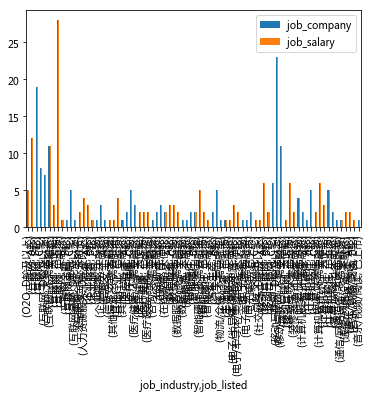

In [295]:
% matplotlib inline
re.plot.bar()

## area区域图

## box箱线图

## 正态分布密度估计图
    - density
    - kde（Kernel Density Estimation）

## hexbin六边形图（2D直方图 + 频率密度图）

## hist直方图

## line曲线图（折线图）

## scatter散点图

## pie饼图